# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
# Set visualization styles
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [3]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [5]:
# Tampilkan 5 baris pertama dengan function head.
print("\nFirst few rows of the dataset:")
print(df.head(5))


First few rows of the dataset:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0        70.00         

In [6]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0        70.00         

In [7]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
print("\nDescriptive statistics of the dataset:")
print(df.describe())


Descriptive statistics of the dataset:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count            2511.00      2519.00              2511.00        2516.00   
mean              297.66        44.68               119.42           1.12   
std               292.23        17.84                70.08           0.59   
min                 0.26        18.00                10.00           1.00   
25%                81.31        27.00                63.00           1.00   
50%               211.36        45.00               112.00           1.00   
75%               413.11        59.00               161.00           1.00   
max              1919.11        80.00               300.00           5.00   

       AccountBalance  
count         2510.00  
mean          5113.44  
std           3897.98  
min            101.25  
25%           1504.73  
50%           4734.11  
75%           7672.69  
max          14977.99  


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [8]:
# Visualizations for EDA
print("\nCreating EDA visualizations...")


Creating EDA visualizations...


In [9]:
# Setting figure size for better visualization
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**


Generating correlation matrix...


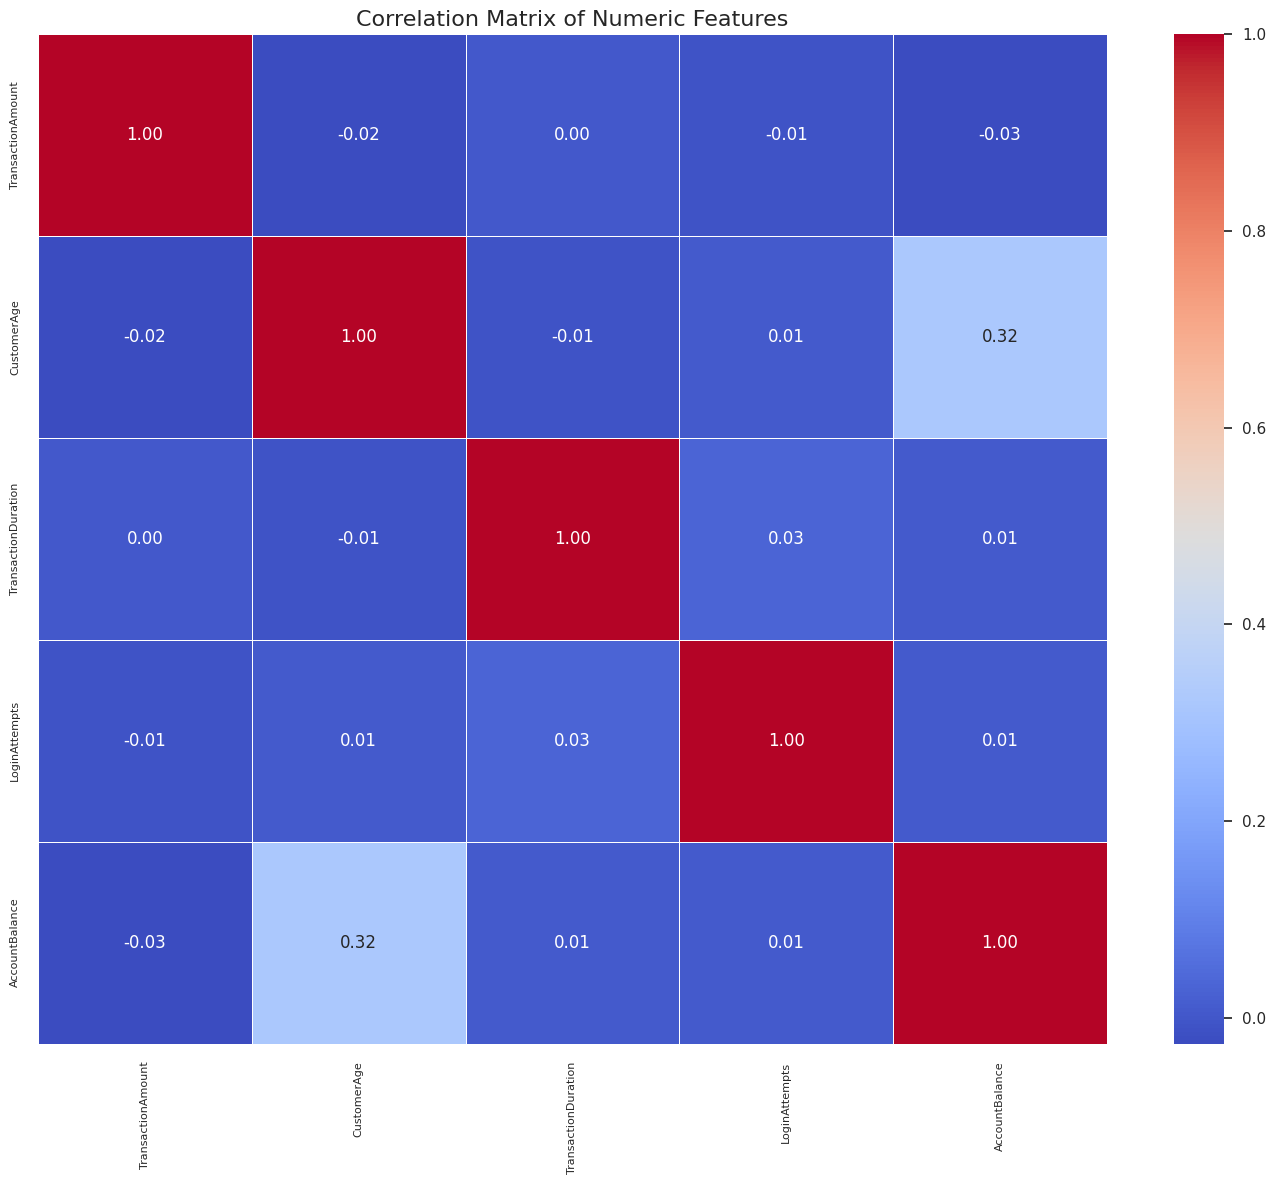

In [10]:
# Correlation Matrix
print("\nGenerating correlation matrix...")
numeric_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


Generating histograms for numeric columns...


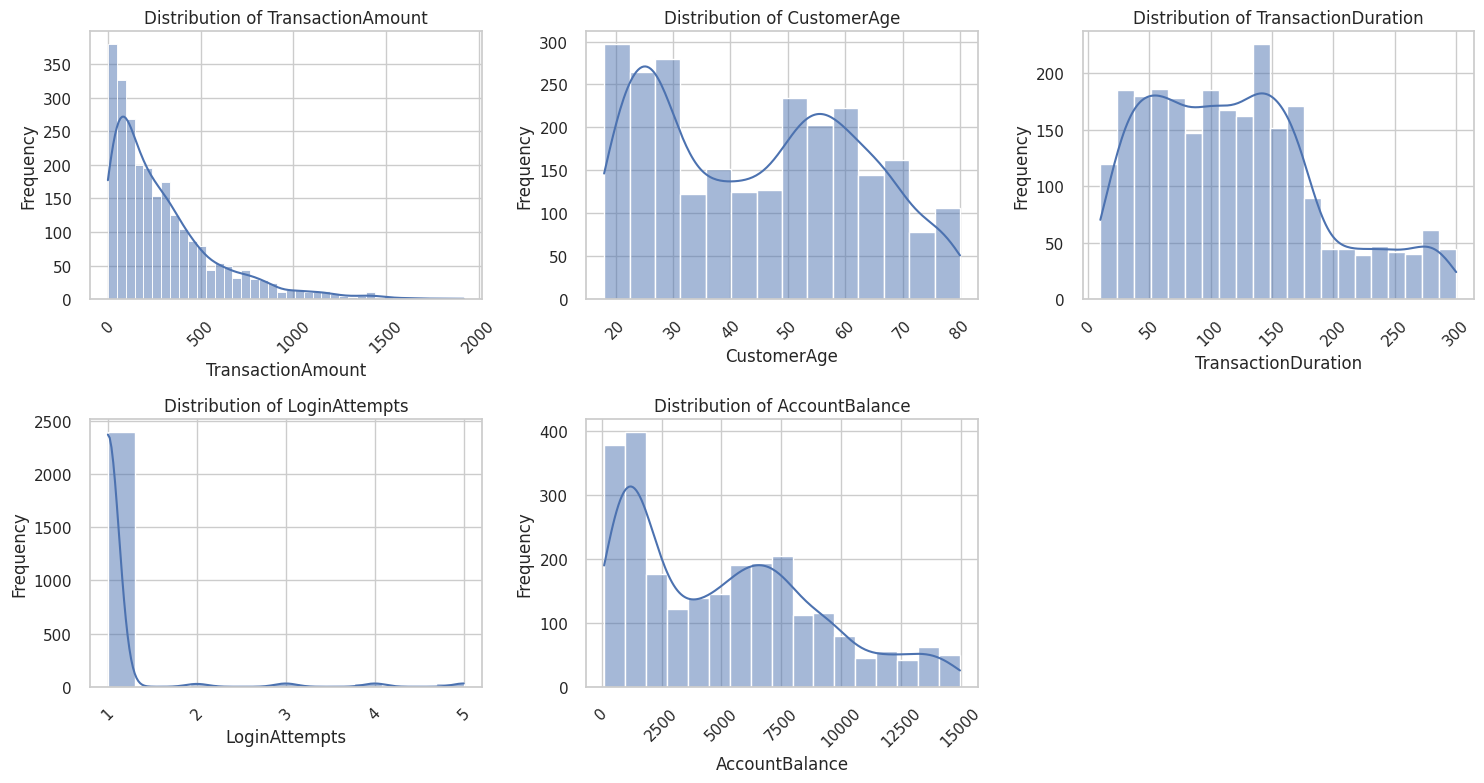

In [11]:
# Histograms for numeric columns
print("\nGenerating histograms for numeric columns...")
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate number of rows and columns for subplots
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 4))
for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Generating histograms for categorical columns...


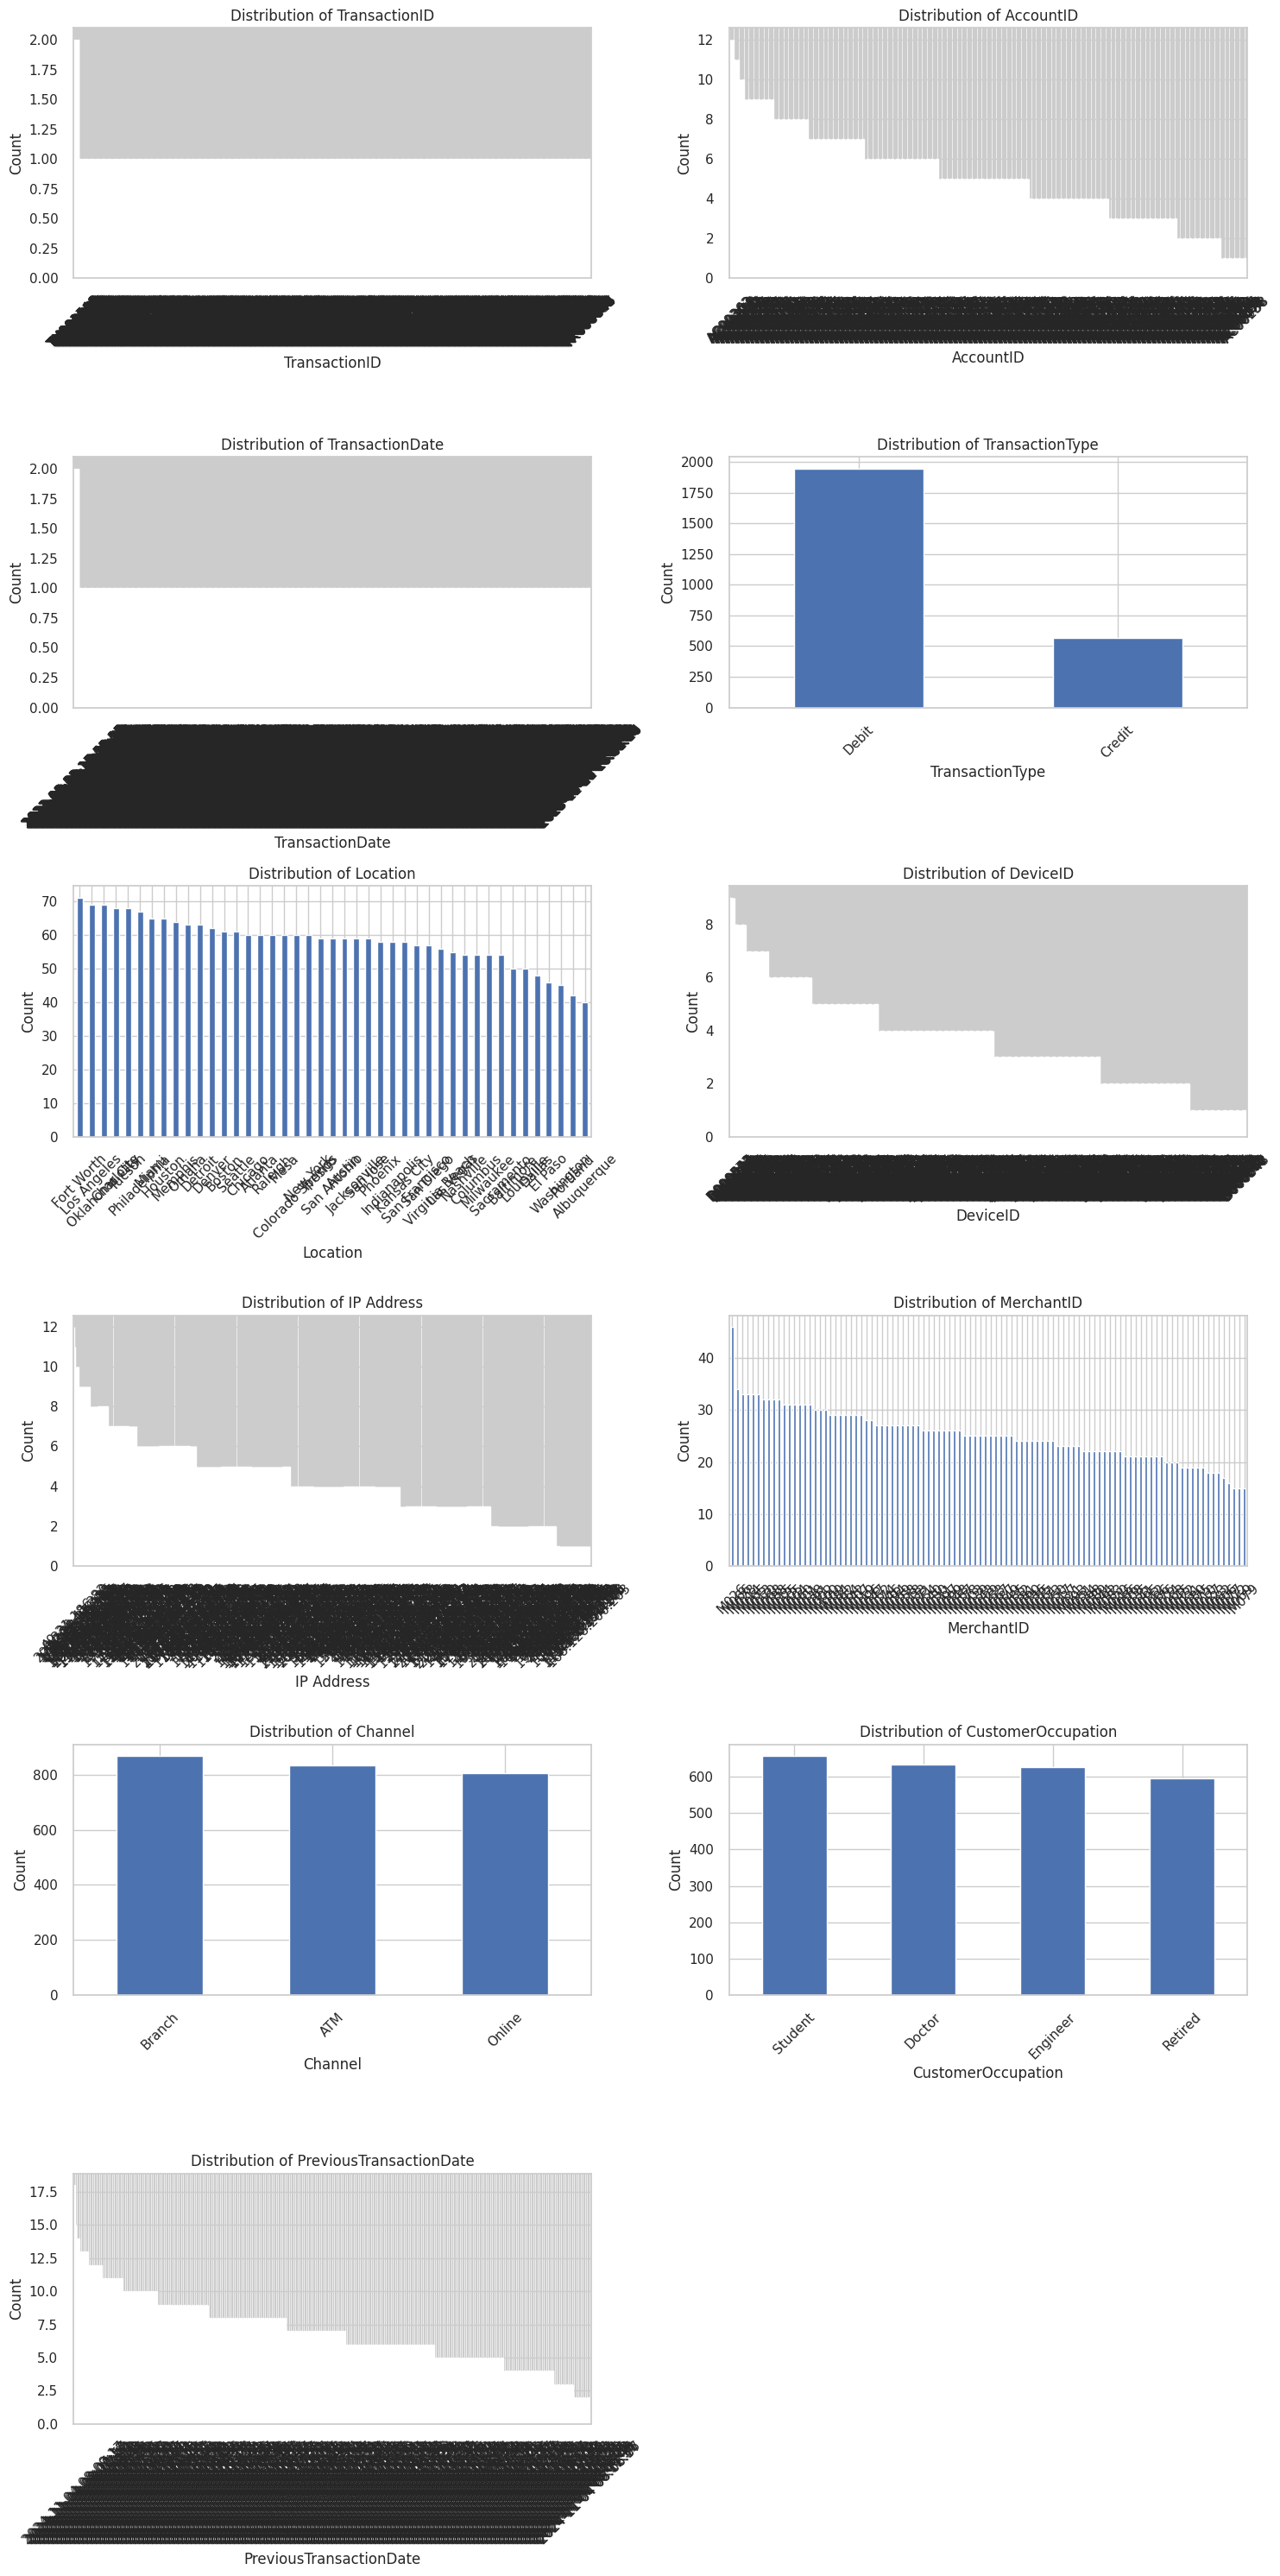


Generating additional visualizations...


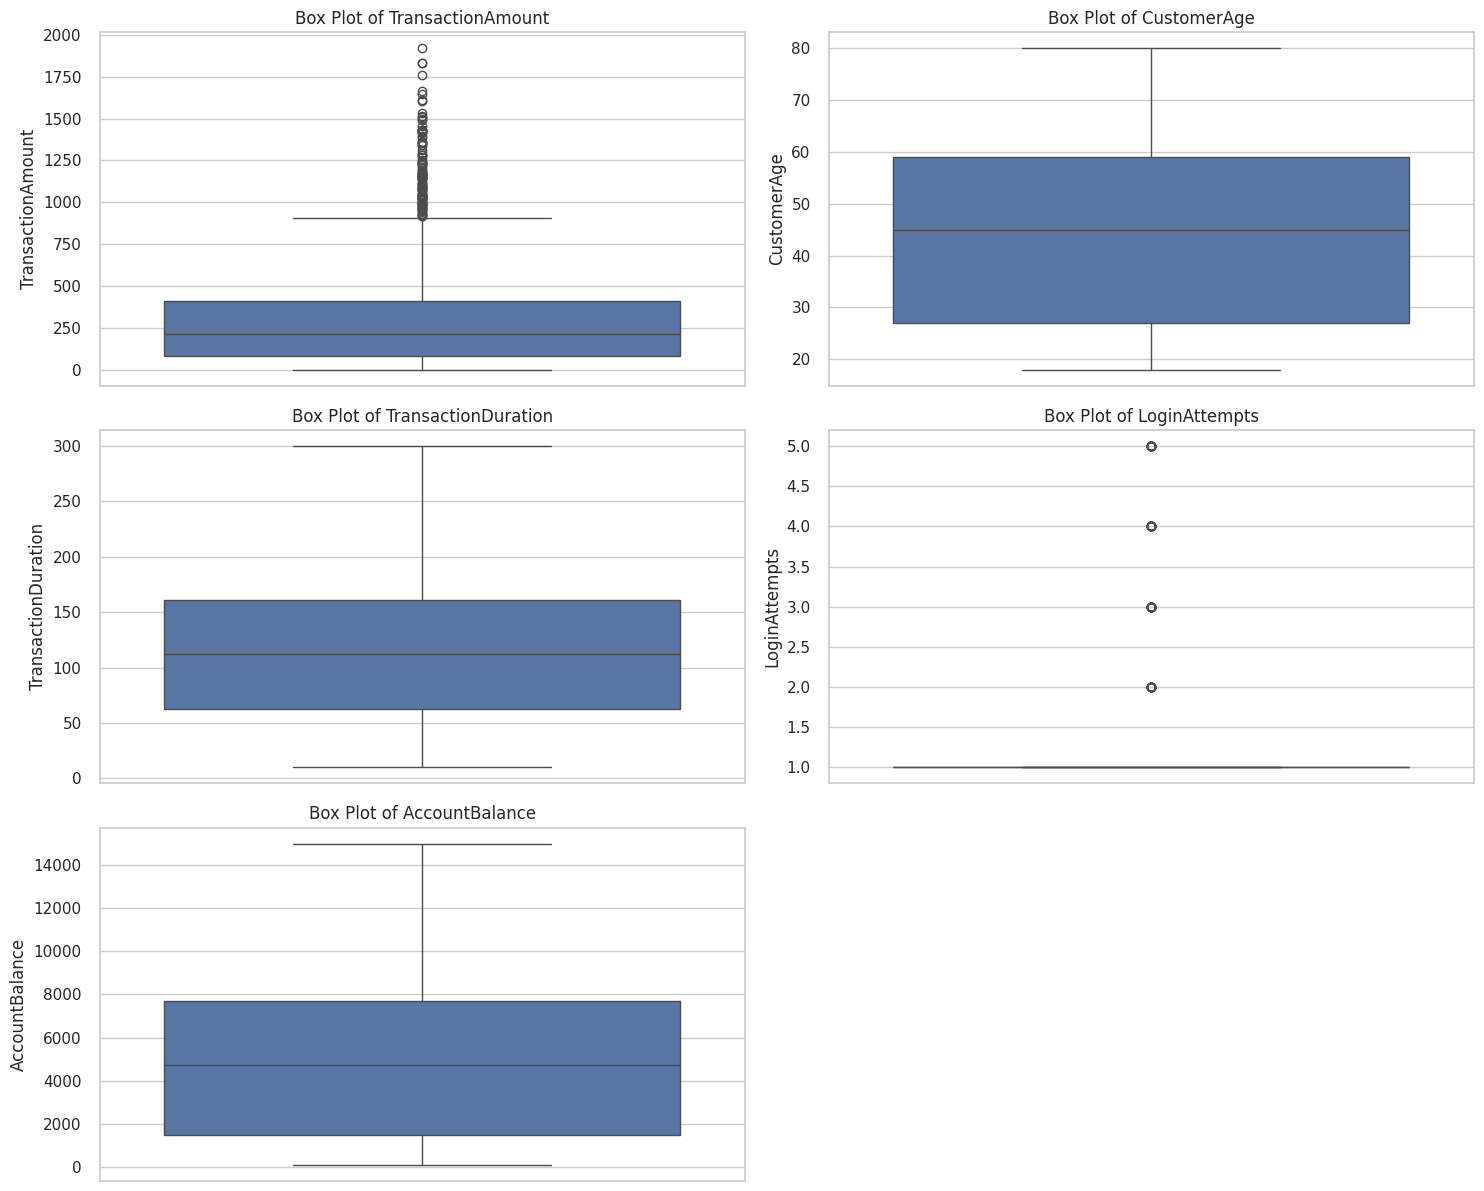

In [13]:
# Histograms for categorical columns
print("\nGenerating histograms for categorical columns...")
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate number of rows and columns for subplots
n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 5))
for i, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nGenerating additional visualizations...")

# Box plots for numeric features to identify outliers
plt.figure(figsize=(15, n_rows * 4))
for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [21]:
# Check for missing values
print("\nChecking for missing values:")
missing_values = df.isnull().sum()
print(missing_values)


Checking for missing values:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [22]:
# Check for duplicated rows
print("\nChecking for duplicated rows:")
duplicated_rows = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicated_rows}")


Checking for duplicated rows:
Number of duplicated rows: 0


In [25]:
# Identify ID columns to drop
id_columns = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']  # Changed 'Ip Address' to 'IP Address'
print(f"\nDropping ID columns: {id_columns}")
df_cleaned = df.drop(columns=id_columns)


Dropping ID columns: ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']


In [26]:
# Mengecek dataset menggunakan isnull().sum()
if df_cleaned.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    # For numeric columns, fillna with mean
    numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        if df_cleaned[col].isnull().sum() > 0:
            df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)

    # For categorical columns, fillna with mode
    categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        if df_cleaned[col].isnull().sum() > 0:
            df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)


In [33]:
# Mengecek dataset menggunakan duplicated().sum()
if duplicated_rows > 0:
    print("\nRemoving duplicated rows...")
    df_cleaned = df_cleaned.drop_duplicates()
    print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")

In [28]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
print("\nApplying feature scaling...")
# Separate features for scaling (only numeric)
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Apply Min-Max scaling
scaler = MinMaxScaler()
df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

print("\nPreprocessed data overview:")
print(df_cleaned.head())
print(df_cleaned.describe())


Applying feature scaling...

Preprocessed data overview:
   TransactionAmount      TransactionDate TransactionType   Location Channel  \
0               0.01  2023-04-11 16:29:14           Debit  San Diego     ATM   
1               0.20  2023-06-27 16:44:19           Debit    Houston     ATM   
2               0.07  2023-07-10 18:16:08           Debit       Mesa  Online   
3               0.10  2023-05-05 16:32:11           Debit    Raleigh  Online   
4               0.01  2023-10-16 17:51:24          Credit    Atlanta  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         0.84             Doctor                 0.24           0.00   
1         0.81             Doctor                 0.45           0.00   
2         0.02            Student                 0.16           0.00   
3         0.13            Student                 0.05           0.00   
4         0.43            Student                 0.65           0.00   

   AccountBalance Prev

In [32]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
print("\nEncoding categorical features...")
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Keep original data for later reference
df_original = df_cleaned.copy()

# Apply label encoding for categorical features
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le
    print(f"Encoded {col} with {len(le.classes_)} unique values")

# Create binning for at least one numeric column
print("\nCreating binning for TransactionAmount feature...")
# TransactionAmount binning

# Get the actual minimum and maximum values for binning before scaling
original_min = df['TransactionAmount'].min()
original_max = df['TransactionAmount'].max()

df_cleaned['TransactionAmount_Bin'] = pd.cut(
    df_original['TransactionAmount'],  # Use original data for binning
    bins=[original_min - 1, 100, 500, 1000, original_max], # Use original min/max for bins
    labels=['Small', 'Medium', 'Large', 'Very Large'],
    include_lowest=True,  # Include the lowest value in the first bin
    duplicates='drop'     # Avoid error if bins have duplicate edges
)

# Encode the binned feature
le_bin = LabelEncoder()
df_cleaned['TransactionAmount_Bin'] = le_bin.fit_transform(df_cleaned['TransactionAmount_Bin'])
label_encoders['TransactionAmount_Bin'] = le_bin


Encoding categorical features...

Creating binning for TransactionAmount feature...


In [37]:
df_preprocessed = df_cleaned.copy()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [34]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# Handling outliers using IQR method
print("\nHandling outliers for numeric features...")
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers before handling
    outliers_count = ((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)).sum()
    print(f"Outliers in {col}: {outliers_count}")

    # Replace outliers with bounds
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)


Handling outliers for numeric features...
Outliers in TransactionAmount: 0
Outliers in TransactionDate: 0
Outliers in TransactionType: 0
Outliers in Location: 0
Outliers in Channel: 0
Outliers in CustomerAge: 0
Outliers in CustomerOccupation: 0
Outliers in TransactionDuration: 0
Outliers in LoginAttempts: 0
Outliers in AccountBalance: 0
Outliers in PreviousTransactionDate: 0
Outliers in TransactionAmount_Bin: 0


In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [35]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
print(df_cleaned.describe())

       TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
count            2516.00          2516.00          2516.00   2516.00  2516.00   
mean                0.15          1228.27             1.00     20.93     0.99   
std                 0.13           725.32             0.00     12.19     0.80   
min                 0.00             0.00             1.00      0.00     0.00   
25%                 0.04           599.75             1.00     11.00     0.00   
50%                 0.11          1227.50             1.00     21.00     1.00   
75%                 0.21          1856.25             1.00     31.00     2.00   
max                 0.47          2484.00             1.00     42.00     2.00   

       CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
count      2516.00             2516.00              2516.00        2516.00   
mean          0.43                1.52                 0.38           0.00   
std           0.29                1.

In [38]:
print("\n\n# Criteria 3: Building Clustering Model")
print("=======================================")

# Prepare the dataset for clustering
X_cluster = df_preprocessed.copy()



# Criteria 3: Building Clustering Model


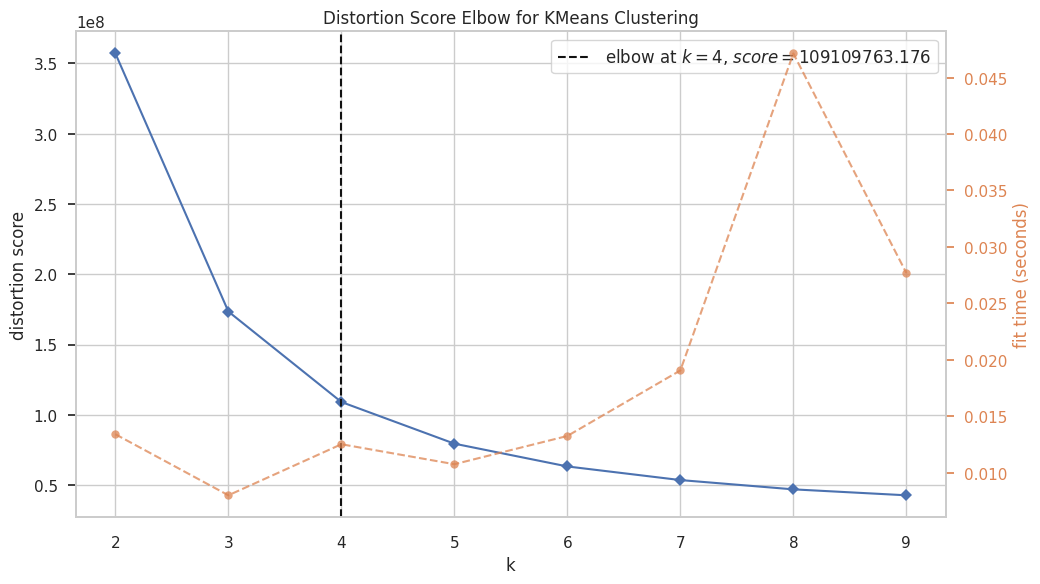


Optimal number of clusters: 4


In [40]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()print("\nDetermining optimal number of clusters using Elbow Method...")
plt.figure(figsize=(10, 6))
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 10))
visualizer.fit(X_cluster)
visualizer.show()
optimal_k = visualizer.elbow_value_
print(f"\nOptimal number of clusters: {optimal_k}")

if optimal_k is None:
    optimal_k = 4
    print(f"No clear elbow detected. Choosing {optimal_k} clusters.")

In [41]:
# Menggunakan algoritma K-Means Clustering
print(f"\nBuilding K-Means model with {optimal_k} clusters...")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_cluster)


Building K-Means model with 4 clusters...


In [42]:
# Add cluster labels to the dataframe
X_cluster['Target'] = clusters

Jalankan cell code ini untuk menyimpan model kamu.

In [44]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
print("\nSaving clustering model...")
joblib.dump(kmeans, "model_clustering.h5")


Saving clustering model...


['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [45]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(X_cluster.drop('Target', axis=1), clusters)
print(f"\nSilhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.5002


In [ ]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [47]:
# Membangun model menggunakan PCA.
print("\nVisualizing clustering results with PCA...")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_cluster.drop('Target', axis=1))


Visualizing clustering results with PCA...


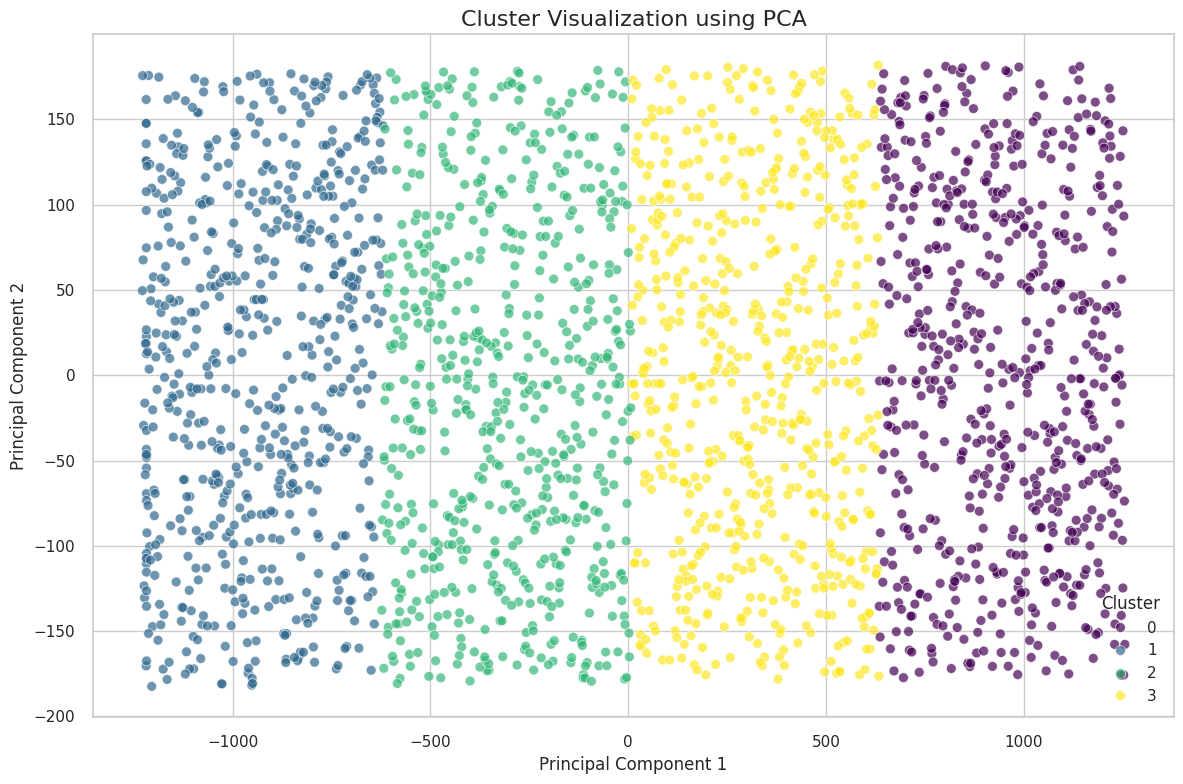

In [48]:
pca_df = pd.DataFrame(
    data=pca_result,
    columns=['Principal Component 1', 'Principal Component 2']
)
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster',
    palette='viridis',
    data=pca_df,
    s=50,
    alpha=0.7
)
plt.title('Cluster Visualization using PCA', fontsize=16)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [49]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [50]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
print("\n\n# Criteria 4: Interpreting Clustering Results")
print("============================================")

# Analyze cluster characteristics
print("\nAnalyzing cluster characteristics...")
cluster_analysis = df_preprocessed.copy()
cluster_analysis['Target'] = clusters

# Calculate statistics for each cluster
print("\nNumerical Features - Statistics by Cluster:")
numerical_stats = cluster_analysis.groupby('Target').agg(['mean', 'min', 'max'])
print(numerical_stats)

# Calculate mode for categorical features in each cluster
categorical_columns = df_original.select_dtypes(include=['object']).columns
print("\nCategorical Features - Mode by Cluster:")
for col in categorical_columns:
    print(f"\nMode of {col} by cluster:")
    for cluster_id in range(optimal_k):
        mode_value = df_original.loc[cluster_analysis['Target'] == cluster_id, col].mode()[0]
        print(f"Cluster {cluster_id}: {mode_value}")



# Criteria 4: Interpreting Clustering Results

Analyzing cluster characteristics...

Numerical Features - Statistics by Cluster:
       TransactionAmount           TransactionDate              \
                    mean  min  max            mean   min   max   
Target                                                           
0                   0.14 0.00 0.47         2173.96  1863  2484   
1                   0.15 0.00 0.47          290.89     0   609   
2                   0.14 0.00 0.47          921.19   605  1235   
3                   0.16 0.00 0.47         1549.00  1236  1862   

       TransactionType         Location         Channel         CustomerAge  \
                  mean min max     mean min max    mean min max        mean   
Target                                                                        
0                 1.00   1   1    20.70   0  42    1.04   0   2        0.43   
1                 1.00   1   1    20.97   0  42    0.97   0   2        0.41   
2          

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. Cluster 0:

Rata-rata (mean):
- TransactionAmount: 0.14 (rendah)

- TransactionDate: 2173.96 (tinggi)

- TransactionDuration: 0.39 (relatif tinggi)

- CustomerAge: 0.43 (relatif muda)

- AccountBalance: 0.35 (tinggi)

- PreviousTransactionDate: 179.45 (tinggi)

Analisis:
Cluster ini mencerminkan pengguna lebih tua (tanggal transaksi tinggi, artinya terjadi di waktu yang lebih baru) dengan frekuensi transaksi normal dan saldo akun cukup besar. Pengguna cenderung stabil dengan aktivitas login 0 dan transaksi dalam jumlah kecil. Durasi transaksi sedikit lebih panjang.

2. Cluster 1:

Rata-rata (mean):

- TransactionAmount: 0.15

- TransactionDate: 290.89 (sangat rendah)

- TransactionDuration: 0.37 (paling rendah)

- CustomerAge: 0.41 (termuda)

- AccountBalance: 0.33 (sedikit lebih rendah)

- PreviousTransactionDate: 188.04 (tinggi)

Analisis:
Cluster ini mencerminkan pengguna sangat awal dalam waktu (tanggal transaksi lama), berusia lebih muda, dan memiliki aktivitas transaksi yang pendek dan nominal transaksi kecil. Mereka juga memiliki durasi transaksi paling singkat, mungkin mencerminkan transaksi otomatis atau sangat efisien. Ini bisa menunjukkan pengguna lama atau early adopters.

3. Cluster 2:

Rata-rata (mean):

- TransactionAmount: 0.14

- TransactionDate: 921.19

- TransactionDuration: 0.38

- CustomerAge: 0.44

- AccountBalance: 0.34

- PreviousTransactionDate: 170.74

Analisis:
Cluster ini berada di tengah-tengah—bukan pengguna baru ataupun paling aktif. Mereka memiliki jumlah transaksi rendah, usia menengah, dan transaksi sedikit lebih panjang dibanding Cluster 1. Ini kemungkinan adalah pengguna umum dengan kebiasaan stabil.

4. Cluster 3:

Rata-rata (mean):

- TransactionAmount: 0.16 (tertinggi)

- TransactionDate: 1549.00

- TransactionDuration: 0.38

- CustomerAge: 0.44

- AccountBalance: 0.33 (paling rendah)

- PreviousTransactionDate: 178.04

Analisis:
Cluster ini mewakili pengguna dengan frekuensi transaksi lebih tinggi dan usia pengguna lebih matang. Mereka memiliki jumlah transaksi tertinggi dan mungkin bertransaksi lebih sering, namun dengan saldo akun yang relatif lebih rendah. Bisa jadi merupakan pengguna aktif yang sering melakukan transaksi kecil.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [52]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
X_cluster['Target'] = clusters
df_preprocessed['Target'] = clusters

In [53]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_preprocessed.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [54]:
# inverse dataset ke rentang normal
print("\nInverse transforming scaled features...")
inverse_data = df_preprocessed.copy()
inverse_data['Target'] = clusters


Inverse transforming scaled features...


In [58]:
# Get numeric columns (excluding the target column and the binned column)
numeric_cols = [
    col for col in df.select_dtypes(include=['float64', 'int64']).columns
    if col in inverse_data.columns and col != 'TransactionAmount_Bin'
]
# Inverse transform only on the original numeric features
inverse_data[numeric_cols] = scaler.inverse_transform(inverse_data[numeric_cols])

In [59]:
for col in label_encoders.keys():
    if col in inverse_data.columns:
        le = label_encoders[col]
        inverse_data[col] = le.inverse_transform(inverse_data[col].astype(int))

In [60]:
print("\nCluster Interpretation:")
for i in range(optimal_k):
    cluster_data = inverse_data[inverse_data['Target'] == i]
    print(f"\nCluster {i} characteristics:")
    print(f"Number of transactions: {len(cluster_data)}")

    # Get key statistics for important features
    print("Key numeric features (mean values):")
    for col in numeric_cols:
        print(f"  - {col}: {cluster_data[col].mean():.2f}")

    # Show most common categorical values
    print("Most common categorical values:")
    for col in categorical_columns:
        if col in cluster_data.columns:
            value_counts = cluster_data[col].value_counts()
            top_value = value_counts.index[0]
            percentage = (value_counts.iloc[0] / len(cluster_data)) * 100
            print(f"  - {col}: {top_value} ({percentage:.1f}%)")


Cluster Interpretation:

Cluster 0 characteristics:
Number of transactions: 623
Key numeric features (mean values):
  - TransactionAmount: 276.58
  - CustomerAge: 44.72
  - TransactionDuration: 121.65
  - LoginAttempts: 1.00
  - AccountBalance: 5302.02
Most common categorical values:

Cluster 1 characteristics:
Number of transactions: 637
Key numeric features (mean values):
  - TransactionAmount: 286.38
  - CustomerAge: 43.60
  - TransactionDuration: 116.89
  - LoginAttempts: 1.00
  - AccountBalance: 5028.76
Most common categorical values:

Cluster 2 characteristics:
Number of transactions: 629
Key numeric features (mean values):
  - TransactionAmount: 269.56
  - CustomerAge: 45.26
  - TransactionDuration: 118.86
  - LoginAttempts: 1.00
  - AccountBalance: 5089.12
Most common categorical values:

Cluster 3 characteristics:
Number of transactions: 627
Key numeric features (mean values):
  - TransactionAmount: 304.99
  - CustomerAge: 45.01
  - TransactionDuration: 120.84
  - LoginAttemp

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [62]:
# Analyze cluster characteristics with inverse transformed data
print("\nAnalyzing cluster characteristics with inverse transformed data...")
# Get the numeric columns (including 'TransactionAmount' after inversion)
numeric_cols_for_analysis = inverse_data.select_dtypes(include=np.number).columns
inverse_cluster_stats = inverse_data.groupby('Target')[numeric_cols_for_analysis].agg(['mean', 'min', 'max'])
print(inverse_cluster_stats)



Analyzing cluster characteristics with inverse transformed data...
       TransactionAmount             TransactionDate              \
                    mean  min    max            mean   min   max   
Target                                                             
0                 276.58 0.26 899.28         2173.96  1863  2484   
1                 286.38 0.86 899.28          290.89     0   609   
2                 269.56 1.41 899.28          921.19   605  1235   
3                 304.99 0.32 899.28         1549.00  1236  1862   

       TransactionType         Location         Channel         CustomerAge  \
                  mean min max     mean min max    mean min max        mean   
Target                                                                        
0                 1.00   1   1    20.70   0  42    1.04   0   2       44.72   
1                 1.00   1   1    20.97   0  42    0.97   0   2       43.60   
2                 1.00   1   1    21.22   0  42    0.99   0 

In [63]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
print("\nSaving inverse transformed data with cluster labels...")
inverse_data.to_csv('data_clustering_inverse.csv', index=False)


Saving inverse transformed data with cluster labels...
